In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def drop_columns(data):
    for i in data.columns:
        column_with_50p_missing_value = data[i].isnull().sum() / len(data) * 100 > 50
        if column_with_50p_missing_value:
            data.drop([i], axis = 1, inplace = True)

drop_columns(df)

df.shape


(1460, 77)

In [6]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
    le = LabelEncoder()
    for i in data.columns:
        if data[i].dtype == "object" or data[i].dtype =="bool":
            data[i] = le.fit_transform(data[i])

    return data
label_encoder(df)


'''def remove_object(data):
    for i in data.columns:
        if data[i].dtype == "object" or data[i].dtype =="bool":
            data.drop([i], axis = 1, inplace = True)

remove_object(df)'''


'def remove_object(data):\n    for i in data.columns:\n        if data[i].dtype == "object" or data[i].dtype =="bool":\n            data.drop([i], axis = 1, inplace = True)\n\nremove_object(df)'

In [7]:
def fill_missing(data):
    for i in data.columns:
        if data[i].isnull().any():
            data[i].fillna(np.mean(data[i]), inplace = True)

fill_missing(df)

<Axes: >

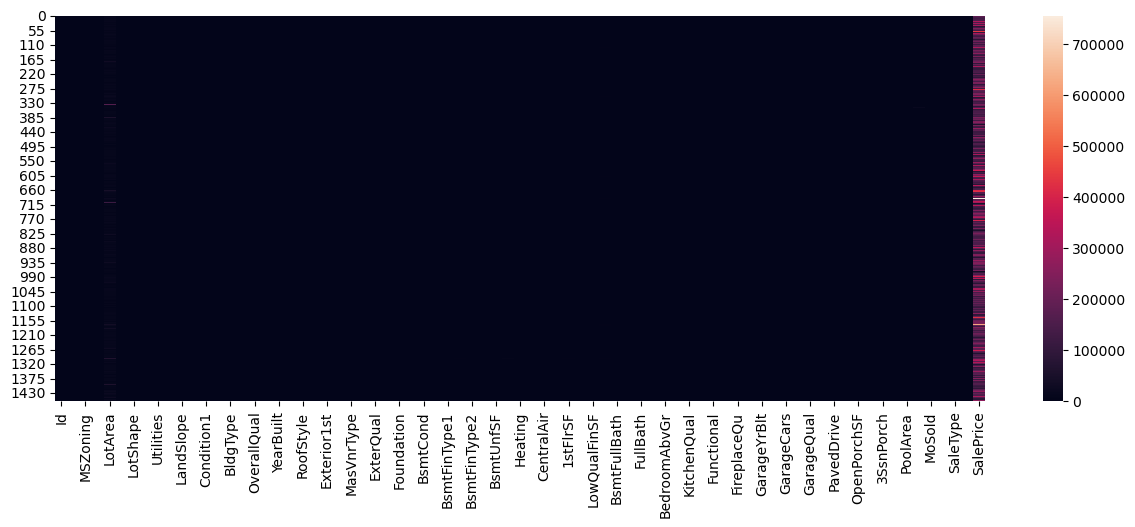

In [8]:
plt.figure(figsize=[15, 5])
sns.heatmap(df)

<Axes: >

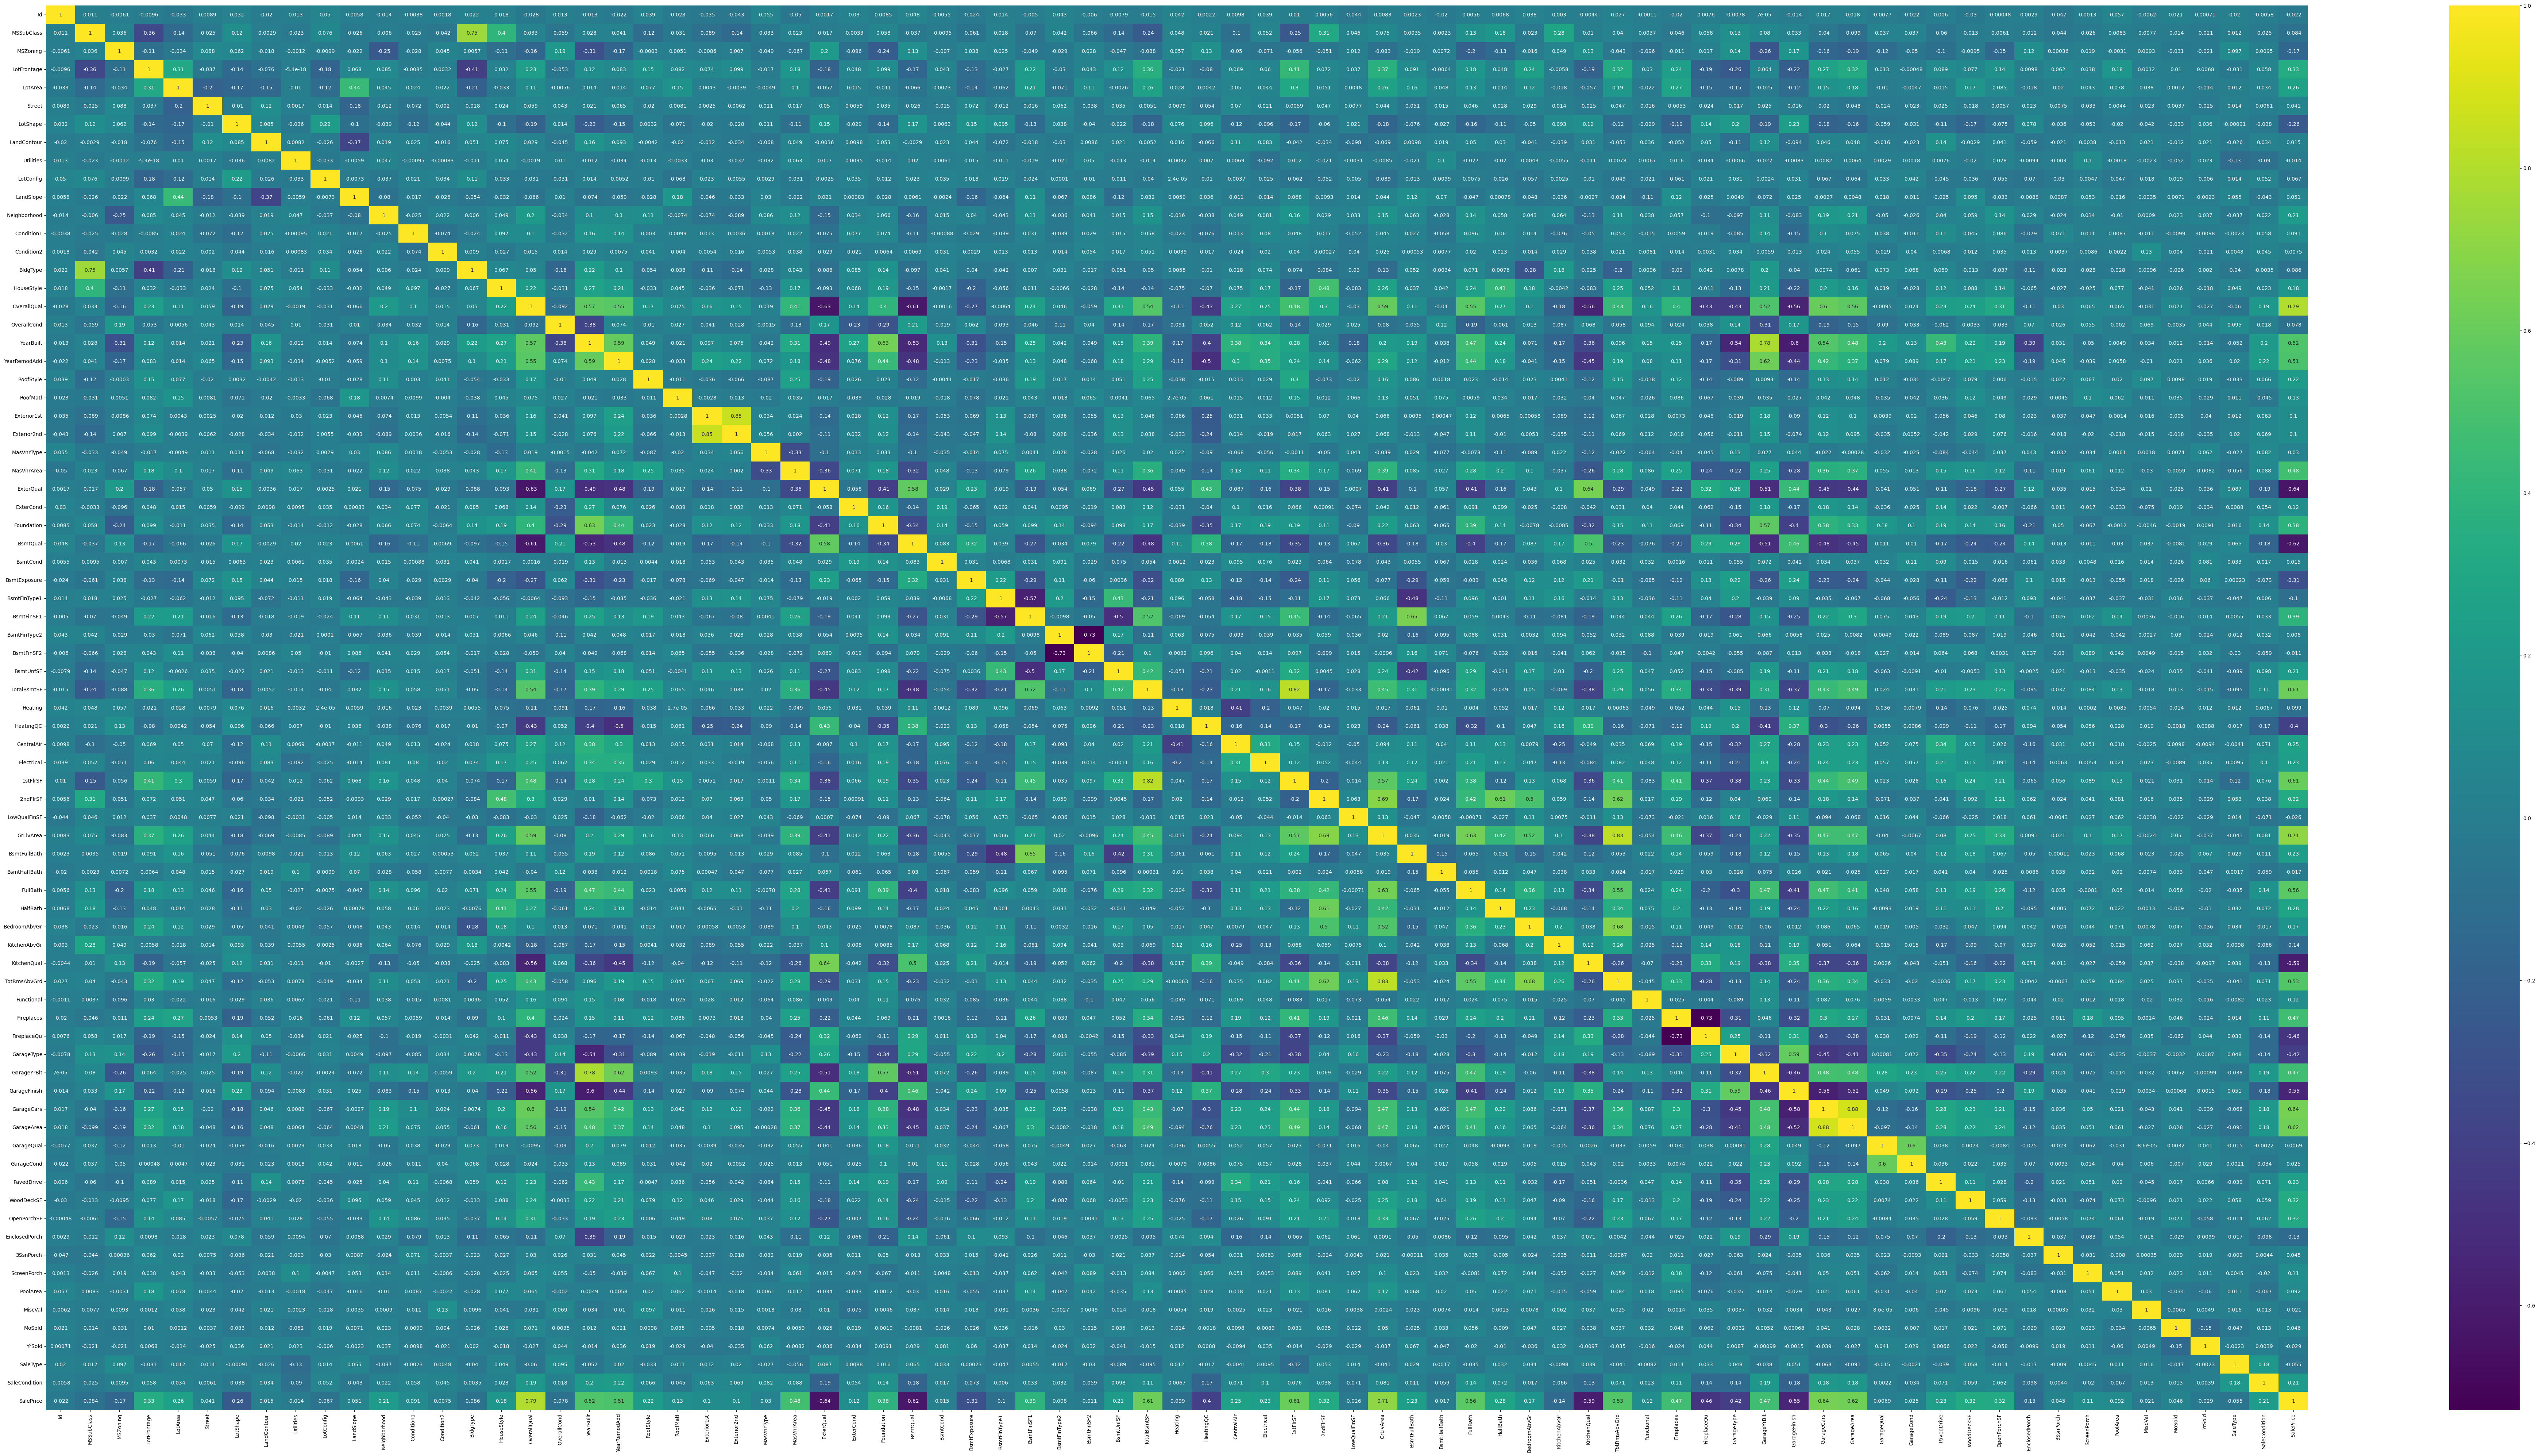

In [9]:
plt.figure(figsize=[100, 50])
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")

In [10]:
x = df.drop(["SalePrice", "Id"], axis=1)
y =  df["SalePrice"]
x.shape

(1460, 75)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)
x_train.shape

(1168, 75)

In [12]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled.shape

(1168, 75)

In [13]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(74, activation = "relu", input_dim = 75),
    tf.keras.layers.Dense(128, activation = "relu",),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear"),
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"]
)

model.fit(
    x_train_scaled,
    y_train,
    epochs=1000,
    validation_split=0.2, 
    verbose = 0   
)

model.summary()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 74)                5624      
                                                                 
 dense_1 (Dense)             (None, 128)               9600      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,377
Trainable params: 48,377
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_pred = model.predict(x_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


0.7996901460747683

In [15]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor()
xg.fit(x_train_scaled, y_train)

y_prediction = xg.predict(x_test_scaled)
r2_score(y_test, y_prediction)

0.753990595969892